## Import Packages and Functions

In [1]:
library(tidyverse)
library(gridExtra)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
# Modify theme_publication for this figure
theme_Publication <- function(base_size=14, base_family="Helvetica") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(.75)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.margin = margin(0),
               legend.title=element_blank(),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
}

In [3]:
mis_z_binned <- read.table("../2018/apr/mis_z/2018-04-06_exac_mis_z_Default_0-10.01_binwidth_0.5_all.tsv", header=TRUE, sep="\t", quote = "", comment.char = "")
colnames(mis_z_binned)[5] <- "greater_or_equal"
colnames(mis_z_binned)[6] <- "less"

In [4]:
grouped_mis_z_binned_2016 = mis_z_binned %>% count(greater_or_equal, !is.na(omim_gene_2016))
colnames(grouped_mis_z_binned_2016)[2] = "has_omim_phenotype"
colnames(grouped_mis_z_binned_2016)[3] = "n_2016"
grouped_mis_z_binned_2016$n_2016_normalized = grouped_mis_z_binned_2016$n_2016 + 0.1

grouped_mis_z_binned_2018 = mis_z_binned %>% count(greater_or_equal, !is.na(omim_gene_2018))
colnames(grouped_mis_z_binned_2018)[2] = "has_omim_phenotype"
colnames(grouped_mis_z_binned_2018)[3] = "n_2018"
grouped_mis_z_binned_2018$n_2018_normalized = grouped_mis_z_binned_2018$n_2018 + 0.1

grouped_mis_z_binned = dplyr::left_join(grouped_mis_z_binned_2016, grouped_mis_z_binned_2018, by=c("greater_or_equal", "has_omim_phenotype"))

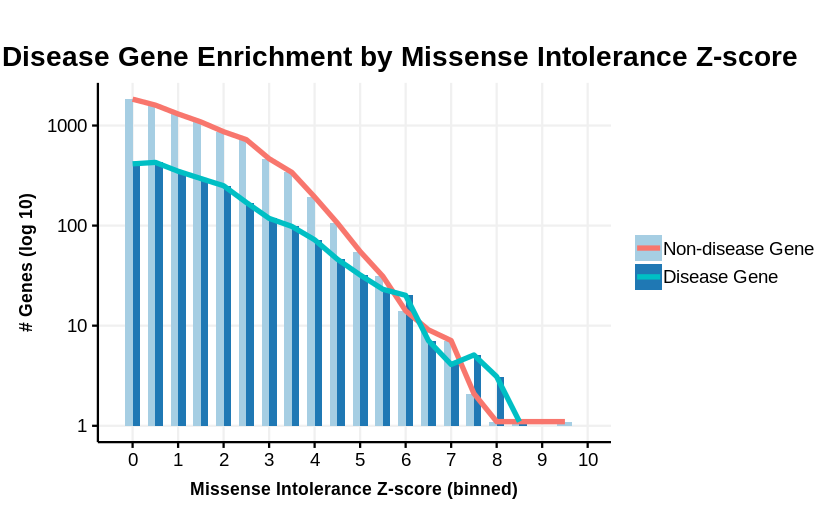

In [5]:
figure_2 = ggplot(grouped_mis_z_binned, aes(greater_or_equal, n_2016_normalized, fill = has_omim_phenotype)) + 
  geom_bar(stat="identity", position = "dodge", width = 0.33) + 
  geom_line(stat="identity", aes(color=has_omim_phenotype), size=1.5) + 
  scale_color_discrete(labels=c("Non-disease Gene", "Disease Gene")) +
  scale_fill_brewer(palette = "Paired", labels=c("Non-disease Gene", "Disease Gene")) + 
  ylab("# Genes (log 10)") +
  scale_y_log10() +
  xlab("Missense Intolerance Z-score (binned)") +
  scale_x_continuous(breaks=c(0:10), limits=c(-0.25, 10)) +
  ggtitle("\t\tDisease Gene Enrichment by Missense Intolerance Z-score\t") +
  theme_Publication()

options(repr.plot.width=7, repr.plot.height=4.32)

figure_2